In [1]:
import pandas as pd
import numpy as np

# Load Data

In [2]:
df=pd.read_csv('UC#27_Data.csv')

In [3]:
df1 = df[['Test Case ID', 'Buckets Items']]

In [4]:
df1 = df1.drop_duplicates(subset='Test Case ID')

In [5]:
df1 = df1.reset_index()

In [6]:
#df1 = df1.drop(columns='index')
df1.rename(columns = {'Test Case ID' : 'Test_Case_ID'}, inplace=True)

In [7]:
df2 = pd.read_csv('Clustered.csv')

In [8]:
df2

,Unnamed: 0,Test_Case_ID,Test_Run_Id,Failure_Step_count_(since_inception),Failed_Steps,Exception_Name,Application_Under_Test,Failed_Step_update_date,Execution_Time_for_test_case,Predecessor_TestCase_ID,Successor_TestCase_ID,exe_day,exe_month,exe_hour,exe_min,Clusters
0,0,457,122,1,3,Fails to navigate step2,NaN,191,2019-07-10 17:16:00,0,405,191,7,17,16,3
1,1,405,122,1,3,"Verification Failed. Expected text: ""Manual Ha...",NaN,191,2019-07-10 18:11:00,457,371,191,7,18,11,0
2,2,371,122,1,8,"Verification Failed. Expected text: ""Step 6 of...",NaN,191,2019-07-10 19:54:00,405,370,191,7,19,54,0
3,3,370,122,1,2,"Verification Failed. Expected text: ""Step 6 of...",NaN,191,2019-07-10 19:58:00,371,369,191,7,19,58,0
4,4,369,122,1,9,"Verification Failed. Expected text: ""Step 6 of...",NaN,191,2019-07-10 20:02:00,370,431,191,7,20,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,341,122,1,10,Unable to find object with specified locator (...,NaN,192,2019-07-11 09:21:00,320,348,192,7,9,21,3
129,129,348,122,1,2,Unable to find object with specified locator (...,NaN,192,2019-07-11 09:32:00,341,351,192,7,9,32,3
130,130,351,122,1,9,Unable to find object with specified locator (...,NaN,192,2019-07-11 09:34:00,348,350,192,7,9,34,3
131,131,350,122,1,5,Unable to find object with specified locator (...,NaN,192,2019-07-11 09:40:00,351,336,192,7,9,40,3


In [9]:
#df2.drop(df2.tail(3).index,inplace=True)

In [10]:
df2 = df2[['Test_Case_ID', 'Exception_Name', 'Failed_Step_update_date','Execution_Time_for_test_case','Predecessor_TestCase_ID','Successor_TestCase_ID' ]]

In [11]:
df2

,Test_Case_ID,Exception_Name,Failed_Step_update_date,Execution_Time_for_test_case,Predecessor_TestCase_ID,Successor_TestCase_ID
0,457,Fails to navigate step2,191,2019-07-10 17:16:00,0,405
1,405,"Verification Failed. Expected text: ""Manual Ha...",191,2019-07-10 18:11:00,457,371
2,371,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 19:54:00,405,370
3,370,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 19:58:00,371,369
4,369,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 20:02:00,370,431
...,...,...,...,...,...,...
128,341,Unable to find object with specified locator (...,192,2019-07-11 09:21:00,320,348
129,348,Unable to find object with specified locator (...,192,2019-07-11 09:32:00,341,351
130,351,Unable to find object with specified locator (...,192,2019-07-11 09:34:00,348,350
131,350,Unable to find object with specified locator (...,192,2019-07-11 09:40:00,351,336


# Preprocessing

In [12]:
#Update_date=[]
#for date in df['Step update date']:
#    period = pd.Period(date, freq='D')
#    Update_date.append(period.dayofyear)

#df['Step update date']=Update_date

In [13]:
import datetime as dt

In [14]:
#Converting the field type into Date and Time

df2['Execution Time'] = pd.to_datetime(df2['Execution_Time_for_test_case'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
df2['Execution Time'].dt.hour.head()

0    17
1    18
2    19
3    19
4    20
Name: Execution Time, dtype: int64

In [16]:
df2['exe_day'] = df2['Execution Time'].dt.dayofyear

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
#df['exe_month'] = df['Execution Time'].dt.month

In [18]:
df2['exe_hour'] = df2['Execution Time'].dt.hour

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df2['exe_min'] = df2['Execution Time'].dt.minute

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
#df['exe_sec'] = df['Execution Time'].dt.second

In [21]:
df2

,Test_Case_ID,Exception_Name,Failed_Step_update_date,Execution_Time_for_test_case,Predecessor_TestCase_ID,Successor_TestCase_ID,Execution Time,exe_day,exe_hour,exe_min
0,457,Fails to navigate step2,191,2019-07-10 17:16:00,0,405,2019-07-10 17:16:00,191,17,16
1,405,"Verification Failed. Expected text: ""Manual Ha...",191,2019-07-10 18:11:00,457,371,2019-07-10 18:11:00,191,18,11
2,371,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 19:54:00,405,370,2019-07-10 19:54:00,191,19,54
3,370,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 19:58:00,371,369,2019-07-10 19:58:00,191,19,58
4,369,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 20:02:00,370,431,2019-07-10 20:02:00,191,20,2
...,...,...,...,...,...,...,...,...,...,...
128,341,Unable to find object with specified locator (...,192,2019-07-11 09:21:00,320,348,2019-07-11 09:21:00,192,9,21
129,348,Unable to find object with specified locator (...,192,2019-07-11 09:32:00,341,351,2019-07-11 09:32:00,192,9,32
130,351,Unable to find object with specified locator (...,192,2019-07-11 09:34:00,348,350,2019-07-11 09:34:00,192,9,34
131,350,Unable to find object with specified locator (...,192,2019-07-11 09:40:00,351,336,2019-07-11 09:40:00,192,9,40


In [22]:
#Concatenating Two Data framse using Test Case ID
df3 = pd.merge(df2, df1, on ='Test_Case_ID',how ='left')

In [23]:
df3

,Test_Case_ID,Exception_Name,Failed_Step_update_date,Execution_Time_for_test_case,Predecessor_TestCase_ID,Successor_TestCase_ID,Execution Time,exe_day,exe_hour,exe_min,index,Buckets Items
0,457,Fails to navigate step2,191,2019-07-10 17:16:00,0,405,2019-07-10 17:16:00,191,17,16,0.0,Automation Issue
1,405,"Verification Failed. Expected text: ""Manual Ha...",191,2019-07-10 18:11:00,457,371,2019-07-10 18:11:00,191,18,11,49.0,Infrastrature Issue
2,371,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 19:54:00,405,370,2019-07-10 19:54:00,191,19,54,93.0,Automation Issue
3,370,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 19:58:00,371,369,2019-07-10 19:58:00,191,19,58,96.0,Automation Issue
4,369,"Verification Failed. Expected text: ""Step 6 of...",191,2019-07-10 20:02:00,370,431,2019-07-10 20:02:00,191,20,2,102.0,Automation Issue
...,...,...,...,...,...,...,...,...,...,...,...,...
128,341,Unable to find object with specified locator (...,192,2019-07-11 09:21:00,320,348,2019-07-11 09:21:00,192,9,21,245.0,Automation Issue
129,348,Unable to find object with specified locator (...,192,2019-07-11 09:32:00,341,351,2019-07-11 09:32:00,192,9,32,246.0,Automation Issue
130,351,Unable to find object with specified locator (...,192,2019-07-11 09:34:00,348,350,2019-07-11 09:34:00,192,9,34,247.0,Automation Issue
131,350,Unable to find object with specified locator (...,192,2019-07-11 09:40:00,351,336,2019-07-11 09:40:00,192,9,40,248.0,Automation Issue


In [24]:
df3['Buckets Items'].isna().sum()

3

In [25]:
df3.rename(columns = {'Buckets Items' : 'RCA'}, inplace=True)

In [26]:
df3['RCA'].unique()

array(['Automation Issue', 'Infrastrature Issue', 'Application Issue',
       nan, 'Timing Issue', 'Environment Issue', 'Latency related issue'],
      dtype=object)

In [27]:
df3['RCA'].value_counts()

Automation Issue         103
Environment Issue          8
Application Issue          7
Timing Issue               5
Infrastrature Issue        5
Latency related issue      2
Name: RCA, dtype: int64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df3,
    x='RCA',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#chart = sns.countplot(data=df3, x='RCA', palette='Set1')

#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Automation Issue'),
 Text(0, 0, 'Infrastrature Issue'),
 Text(0, 0, 'Application Issue'),
 Text(0, 0, 'Timing Issue'),
 Text(0, 0, 'Environment Issue'),
 Text(0, 0, 'Latency related issue')]

In [29]:
df4=df3.drop(columns='RCA')

In [30]:
df4['RCA_Values'] = np.random.choice([1, 2, 3], df4.shape[0])

In [31]:
df4['RCA_Values'].value_counts()

3    53
2    43
1    37
Name: RCA_Values, dtype: int64

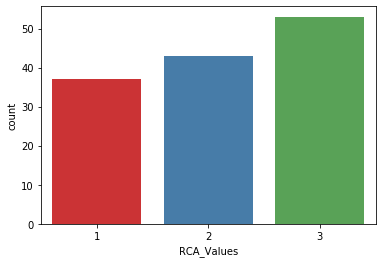

In [32]:
chart = sns.countplot(
    data=df4,
    x='RCA_Values',
    palette='Set1'
)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [36]:
df4['RCA_Values'].replace({1: "Application Issue", 3: "Data Issue",
                           2 : 'Automation Issue'}, inplace=True)

In [37]:
df4 = df4.drop(columns='index')

# Text Wrangling and Normalization

In [38]:
from bs4 import BeautifulSoup
import re
import tqdm
import unicodedata

In [39]:
#function defined to remove html tags from data

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

In [40]:
#function defined to remove unicode data

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

In [41]:
# lower case and remove special characters\whitespaces

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    #doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    doc=re.sub('[0-9]', '', doc)
    norm_docs.append(doc)
  
  return norm_docs

In [42]:
#Data_Preprocessing
norm_df4_exception = pre_process_corpus(df4['Exception_Name'])

100%|██████████| 133/133 [00:00<00:00, 7845.22it/s]


In [43]:
print (norm_df4_exception)

['fails to navigate step', 'verification failed expected text manual handling not found in element', 'verification failed expected text step  of  save and assign claim not found in element', 'verification failed expected text step  of  save and assign claim not found in element', 'verification failed expected text step  of  save and assign claim not found in element', 'verification failed expected text straight payment not found in element', 'verification failed expected text step  of  save and assign claim not found in element', 'verification failed expected text step  of  save and assign claim not found in element', 'verification failed expected text step  of  add costs information not found in element', 'unable to find object with specified locator nametripgenericexpensepopupclaimgenetricexpencedetaildvclaimtripotherdetaildvcompanyname', 'verification failed expected text step  of  save and assign claim not found in element', 'verification failed expected text step  of  add claim in

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

#stop_words = stop_words
cv = CountVectorizer(ngram_range=(1, 1), min_df=0.001, max_df=0.99)
cv_df4_matrix = cv.fit_transform(norm_df4_exception)
cv_df4_matrix=cv_df4_matrix.toarray()

In [46]:

# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
data2=pd.DataFrame(cv_df4_matrix, columns=vocab)

In [47]:
data2

,acceptinsecurecerts,acceptsslcerts,add,amd,and,any,applicationcacheenabled,assign,bcccabbfafeabffdca,been,...,valuedividfnolwizardfnolwizardfindpolicyscreenfnolwizardfindpolicypanelsetpolicyresultlvinsureddivdiv,verification,version,visit,warning,webstorageenabled,wedwsvmtxadu,windows,with,xp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
data1=df4.drop('Exception_Name', axis=1)

In [49]:
data1

,Test_Case_ID,Failed_Step_update_date,Execution_Time_for_test_case,Predecessor_TestCase_ID,Successor_TestCase_ID,Execution Time,exe_day,exe_hour,exe_min,RCA_Values
0,457,191,2019-07-10 17:16:00,0,405,2019-07-10 17:16:00,191,17,16,Automation Issue
1,405,191,2019-07-10 18:11:00,457,371,2019-07-10 18:11:00,191,18,11,Automation Issue
2,371,191,2019-07-10 19:54:00,405,370,2019-07-10 19:54:00,191,19,54,Automation Issue
3,370,191,2019-07-10 19:58:00,371,369,2019-07-10 19:58:00,191,19,58,Automation Issue
4,369,191,2019-07-10 20:02:00,370,431,2019-07-10 20:02:00,191,20,2,Automation Issue
...,...,...,...,...,...,...,...,...,...,...
128,341,192,2019-07-11 09:21:00,320,348,2019-07-11 09:21:00,192,9,21,Data Issue
129,348,192,2019-07-11 09:32:00,341,351,2019-07-11 09:32:00,192,9,32,Application Issue
130,351,192,2019-07-11 09:34:00,348,350,2019-07-11 09:34:00,192,9,34,Automation Issue
131,350,192,2019-07-11 09:40:00,351,336,2019-07-11 09:40:00,192,9,40,Application Issue


In [50]:
data3 = pd.concat([data1,data2], axis=1)

In [52]:
data3['RCA_Values'].value_counts()

Data Issue           53
Automation Issue     43
Application Issue    37
Name: RCA_Values, dtype: int64

# Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [60]:
RCA = data3['RCA_Values'].values
data4 = data3.drop(columns=["RCA_Values",'Execution_Time_for_test_case','Execution Time'])

In [61]:
data4

,Test_Case_ID,Failed_Step_update_date,Predecessor_TestCase_ID,Successor_TestCase_ID,exe_day,exe_hour,exe_min,acceptinsecurecerts,acceptsslcerts,add,...,valuedividfnolwizardfnolwizardfindpolicyscreenfnolwizardfindpolicypanelsetpolicyresultlvinsureddivdiv,verification,version,visit,warning,webstorageenabled,wedwsvmtxadu,windows,with,xp
0,457,191,0,405,191,17,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,405,191,457,371,191,18,11,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,371,191,405,370,191,19,54,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,370,191,371,369,191,19,58,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,369,191,370,431,191,20,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,341,192,320,348,192,9,21,0,0,0,...,0,0,0,0,0,0,0,0,1,0
129,348,192,341,351,192,9,32,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130,351,192,348,350,192,9,34,0,0,0,...,0,0,0,0,0,0,0,0,1,0
131,350,192,351,336,192,9,40,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
train_data, test_data, train_rca, test_rca = train_test_split(data4, RCA, test_size=0.2, random_state=42,stratify=RCA)

# Machine Learning Model

In [63]:
# Random Forest model on BOW features
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# train model
rf.fit(train_data, train_rca)

# predict on test data
rf_bow_predictions = rf.predict(test_data)

In [64]:
rf_bow_predictions

array(['Data Issue', 'Application Issue', 'Automation Issue',
       'Automation Issue', 'Automation Issue', 'Data Issue',
       'Application Issue', 'Data Issue', 'Application Issue',
       'Data Issue', 'Application Issue', 'Data Issue',
       'Application Issue', 'Application Issue', 'Automation Issue',
       'Automation Issue', 'Data Issue', 'Application Issue',
       'Data Issue', 'Data Issue', 'Application Issue',
       'Automation Issue', 'Data Issue', 'Data Issue', 'Automation Issue',
       'Data Issue', 'Automation Issue'], dtype=object)

In [73]:
#Classigication Report

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


print(classification_report(test_rca, rf_bow_predictions))
pd.DataFrame(confusion_matrix(test_rca, rf_bow_predictions))

print('Accuracy Score is ', accuracy_score(test_rca, rf_bow_predictions))

pd.DataFrame(confusion_matrix(test_rca, rf_bow_predictions))

                   precision    recall  f1-score   support

Application Issue       0.38      0.43      0.40         7
 Automation Issue       0.25      0.22      0.24         9
       Data Issue       0.45      0.45      0.45        11

         accuracy                           0.37        27
        macro avg       0.36      0.37      0.36        27
     weighted avg       0.37      0.37      0.37        27

Accuracy Score is  0.37037037037037035


,0,1,2
0,3,3,1
1,2,2,5
2,3,3,5


In [67]:
#using the naive byes build model with Count vectors
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB(alpha=0.01)
clf.fit(train_data, train_rca)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [68]:
nbpred=clf.predict(test_data)

In [69]:
nbpred

array(['Application Issue', 'Application Issue', 'Automation Issue',
       'Application Issue', 'Data Issue', 'Automation Issue',
       'Application Issue', 'Automation Issue', 'Application Issue',
       'Data Issue', 'Data Issue', 'Application Issue', 'Data Issue',
       'Application Issue', 'Application Issue', 'Application Issue',
       'Data Issue', 'Data Issue', 'Data Issue', 'Application Issue',
       'Data Issue', 'Application Issue', 'Automation Issue',
       'Data Issue', 'Automation Issue', 'Data Issue', 'Data Issue'],
      dtype='<U17')

In [74]:
print(classification_report(test_rca, nbpred))

print('Accuracy Score is', accuracy_score(test_rca, nbpred ))

pd.DataFrame(confusion_matrix(test_rca, nbpred))


                   precision    recall  f1-score   support

Application Issue       0.45      0.71      0.56         7
 Automation Issue       0.60      0.33      0.43         9
       Data Issue       0.73      0.73      0.73        11

         accuracy                           0.59        27
        macro avg       0.59      0.59      0.57        27
     weighted avg       0.61      0.59      0.58        27

Accuracy Score is 0.5925925925925926


,0,1,2
0,5,2,0
1,3,3,3
2,3,0,8


# TFIDF 

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer